# US Accidents Expolarity Data Anaylsis

### EDA:
Exploratory Data Analysis (EDA) is a critical step in any data analysis project. It involves analyzing, visualizing, and summarizing the data to gain insights and identify patterns. EDA helps to uncover important relationships between variables and can be used to inform further analysis, modeling, or decision-making.

### About Data:
The US Accidents (2016-2021) dataset available on Kaggle is a rich source of information about traffic accidents that occurred in the United States over a period of five years. This dataset is compiled from various sources, including traffic cameras, police reports, and other public data sources.

The dataset contains information about more than 2.8 million traffic accidents, including the location, time, and date of the accident, as well as information about the severity of the accident, the number of people involved, and the weather conditions at the time of the accident.

This dataset can be used for a variety of purposes, such as identifying the most dangerous roads and intersections, predicting accident rates based on weather conditions or time of day, and evaluating the effectiveness of traffic safety measures.

By conducting EDA on this dataset, we can gain valuable insights into the factors that contribute to traffic accidents and develop strategies to reduce the number of accidents and improve road safety.

## Content:

1. [Data Preparation and Cleaning](#1)
2. [Outliers](#2)
3. [Exploratory Data Analysis(EDA)](#3)
    * [City](#4)
    * [Start Time](#5)
    * [Hour](#111)
    * [Day of week](#6)
    * [Weekend](#7)
    * [Month](#8)
    * [Start Latitude & Longitude](#9)
4. [Ask & Answer Questions](#10)
    * [First Question](#11)
    * [Second Question](#12)
    * [Third Question](#13)
    * [Forth Question](#14)
5. [Summary and Conclusion](#15)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from collections import Counter



In [ ]:
data = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv")

<a id = "1"></a>
# Data Preparation and Cleaning
* Load the file using Pandas
* Look out some information about data & columns
* Fix any missing or incorrect values

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
missing_percentage = data.isna().sum().sort_values(ascending = False) / len(data)
a = missing_percentage[missing_percentage!= 0]
a.plot(kind='barh')

<a id = "2"></a>

## Outliers

In [ ]:
def detect_outliers(df,feature):
    
    outlier_indices = []
    
    
    for i in feature:
        
        #Q1
        
        Q1 = np.percentile(df[i],25)
        
        #Q3
        Q3 = np.percentile(df[i],75)

        #IQR
        IQR = Q3 - Q1
        #Outlier Steps
        outlier_steps = IQR*1.5
        #Detect outliers and their indices
        outlier_list_col = df[(df[i] < Q1 - outlier_steps) | (df[i] > Q3 + outlier_steps)].index
        #Store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
data.loc[detect_outliers(data,numeric_cols)]

<a id = "3"></a>

# Exploratory Data Anaylsis
1. City 
2. Start Time
3. Day of week 
4. Weekend
5. Month
6. Start Latitude & Longitude


<a id = "4"></a>

### 1. City

In [ ]:
len(data.City.unique())

In [ ]:
a = data[["City","Severity"]].groupby('City').mean().sort_values('Severity',ascending = False)
a[:20].plot(kind='barh')
plt.title("Cities with accident severity rate 4")
plt.xlabel("Severity")
plt.show()

In [ ]:
city_accidents = data.City.value_counts()
plt.figure(figsize = (10,10))
city_accidents[:20].plot(kind = 'barh')
plt.title("20 cities with the most accidents in the US")
plt.xlabel("Number of Accidents")
plt.ylabel("Cities")
plt.show()

In [ ]:
plt.figure(figsize = (9,3))
sns.distplot(city_accidents)
plt.title("Distrubution of the accidents")
plt.xlabel("Number of Accidents")
plt.show()

In [ ]:
high_accident_cities = city_accidents[city_accidents >=1000]
low_accident_cities = city_accidents[city_accidents<1000]
plt.figure(figsize = (9,3))
sns.distplot(high_accident_cities)
plt.title("Density of Cities With High Accident Rates")
plt.xlabel("Number of Accidents")
plt.show()

In [ ]:
plt.figure(figsize = (9,3))
sns.distplot(low_accident_cities)
plt.title("Density of Cities With Low Accident Rates")
plt.xlabel("Number of Accidents")
plt.show()

In [ ]:
len(high_accident_cities) / len(data.City.unique())

In [ ]:
len(low_accident_cities) / len(data.City.unique())

In [ ]:
city_accidents[city_accidents ==1].sum()

Only one accident in each of 1100 cities

<a id = "5"></a>

### 2. Start Time

In [ ]:
data.Start_Time = pd.to_datetime(data.Start_Time)

<a id = "111"></a>

#### Hour

In [ ]:
sns.distplot(data.Start_Time.dt.hour, bins = 24, norm_hist = True )
plt.title("Distribution of Accidents")
plt.ylabel('Percentage')
plt.show()

- It seems that accidents start to intensify between 05:00 and 07:00. Here we can infer that traffic is heavy and people are most likely on their way to work. This explains the high rate of accidents. We have the highest accident rate between 16.00 and 18.00. This is generally during rush hour and has the highest traffic volume during the day. From this point, we can say that it is logical that the highest accidents occur between these hours.



<a id = "6"></a>

#### Day of Week

In [ ]:
sns.distplot(data.Start_Time.dt.dayofweek, bins = 7,kde =False, norm_hist = True )
plt.show()

<a id = "7"></a>

#### Weekend

In [ ]:
weekend = data[(data.Start_Time.dt.dayofweek == 6) | (data.Start_Time.dt.dayofweek == 7)]
sns.distplot(weekend.Start_Time.dt.hour, bins = 24, norm_hist = True )
plt.ylabel('Percentage')
plt.show()

As expected, the accident rate is much lower in the morning hours compared to the whole week. The biggest reason for this may be that people sleep in the mornings during the weekend. It makes sense that accident rates increase in the afternoon because people are out and about doing activities. The reason why the accident rate is still higher at night than on normal days could be because people are driving drunk.



<a id = "8"></a>

#### Month

In [ ]:
sns.distplot(data.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

It seems that we have an issue. To figure it out we can check the distrubution of each year.

In [ ]:
df_2016 = data[data.Start_Time.dt.year == 2016]
df_2017 = data[data.Start_Time.dt.year == 2017]
df_2018 = data[data.Start_Time.dt.year == 2018]
df_2019 = data[data.Start_Time.dt.year == 2019]
df_2020 = data[data.Start_Time.dt.year == 2020]
df_2021 = data[data.Start_Time.dt.year == 2021]

In [ ]:
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2017.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2018.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2020.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.distplot(df_2021.Start_Time.dt.month, bins = 12, kde = False,  norm_hist = True )
plt.ylabel('Percentage')
plt.show()

After looking the distrubution of each year we can understand the issue. Probably not enough data was collected for each year. We understand this from this: Look at years like 2016, 2019 and 2020. It is easy to see that data is missing for some months. This explains the lack of a regular distribution. 



<a id = "9"></a>

### 3. Start Latitude & Longitude

In [ ]:
sns.scatterplot(x = data.Start_Lng, y = data.Start_Lat)

When we look at the latitude and longitude of the accidents, we can see that the accidents are distributed in a way similar to the map of America. This is not a surprising result, assuming that the accidents happened in America.

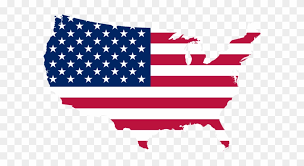

<a id = "10"></a>

# Ask & Answer Questions

1. Are there more acciedents in warmer or colder areas?
2. Which states has the highest number of acciedents? How about per capita?
3. Does New York show up the data? If yes, why is the count lower if this the most populated city
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently
5. Which time of day are accidents most frequent in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year(decreasing / increasing?)
9. When is accidents per unit of traffic the highest?


You can find the answers to questions 5 to 9 above.

<a id = "11"></a>

### First Question
* Are there more acciedents in warmer or colder areas?

In [ ]:
#Change the F to C
data["Celsius"] = data["Temperature(F)"].apply(lambda F : (F-32) * 5/9)

* We'll call areas below 15 degrees Celsius the cold zone.
* Above 15 degrees Celsius, we will call it a warmer zone.

In [ ]:
colder = data.Celsius[data.Celsius < 15]
warmer = data.Celsius[data.Celsius > 15]

In [ ]:
len(colder)

In [ ]:
len(warmer)

* We see that there are more accidents in hot regions than in cold regions.

<a id = "12"></a>

###  Second Question

* Which states has the highest number of acciedents? How about per capita?


In [ ]:
data.State.value_counts().sort_values(ascending = False).index[0]

So answer of the second question is California

<a id = "13"></a>

### Third Question
* Does New York show up the data? If yes, why is the count lower if this the most populated city


In [ ]:
data.City[data.City == "New York"]

It looks like the data includes New York. So let's look at the number of accidents in New York

In [ ]:
data.City[data.City == "New York"].value_counts()


* It seems there were only 7068 accidents in New York. In Miami alone (the city with the highest number of accidents) there are more than 106,000 accidents. Why New York has so few accidents despite being the most populous city needs to be investigated. This could help us in new efforts to reduce accidents in other cities.

<a id = "14"></a>

### Fourth Question
* Among the top 100 cities in number of accidents, which states do they belong to most frequently


In [ ]:
cities_and_states = data[["City","State"]]

In [ ]:
cities_and_states.State[cities_and_states.City.value_counts()[:100]].value_counts()

* The answer to our fourth question is California again. As I mentioned before, these high accident rates or low accident rates should be investigated and measures should be taken accordingly. Why is the highest accident rate in California and not in Oklahoma?

<a id = "15"></a>

# Summary and Conclusion

Insights:

1. Over 1110 cities reported just 1 accident, which needs further investigation.
2. Accidents intensify between 05:00 and 07:00 and between 16:00 and 18:00, which can be attributed to heavy traffic during rush hour.
3. Accidents are lower during weekend mornings, but increase in the afternoon, potentially due to people being out and about.
4. The three cities with the highest number of accidents per year are Miami (>100,000), Los Angeles (>60,000), and Orlando (>50,000), while New York has a surprisingly low number of accidents despite being the most populous city.
5. There are more accidents in hot regions compared to cold regions.
6. California has the highest number of accidents and accident rates per capita among US states
7. The top 100 cities with the most accidents belong to California, highlighting the need for investigation and measures to reduce accident rates in the state.